<a href="https://colab.research.google.com/github/ddy623/Kaggle-Projects/blob/main/Sleep_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split,GridSearchCV
# Set pandas as the default output for sklearn
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [6]:
# Load Data
fpath = '//content/drive/MyDrive/CodingDojo/Data Science Projects/student_sleep_patterns.csv'
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [7]:
df.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [8]:
df['Age'].value_counts()

,count
Age,
21,76
25,72
18,71
20,64
23,62
24,58
22,51
19,46


<Axes: xlabel='Age'>

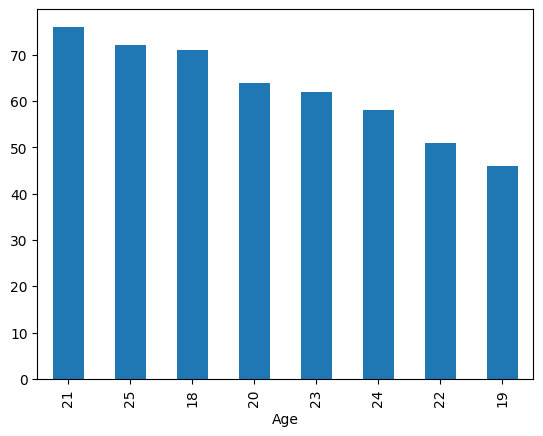

In [9]:
df['Age'].value_counts().plot(kind='bar')

In [10]:
df['Gender'].value_counts()

,count
Gender,
Male,186
Female,166
Other,148


In [11]:
df['Gender'] = df['Gender'].drop(df[df['Gender'] == 'Other'].index)

<Axes: xlabel='Gender'>

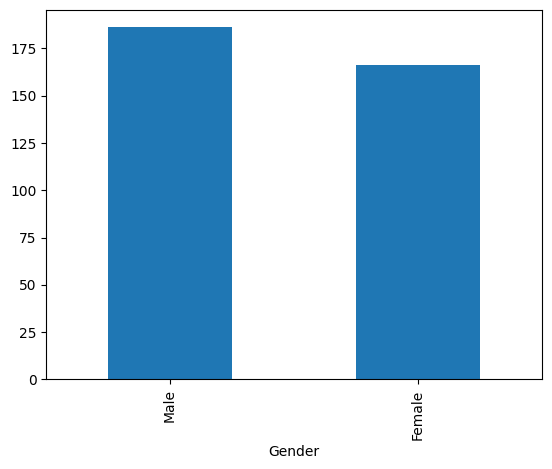

In [12]:
df['Gender'].value_counts().plot(kind='bar')

In [13]:
df['Gender_Numeric'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [14]:
df['Student_ID'].value_counts()

,count
Student_ID,
1,1
330,1
343,1
342,1
341,1
...,...
162,1
161,1
160,1


In [15]:
df['Sleep_Duration'].value_counts()

,count
Sleep_Duration,
8.4,16
4.1,16
4.4,15
7.5,14
5.2,14
4.9,14
4.2,13
7.0,13
8.7,13


<Axes: ylabel='Frequency'>

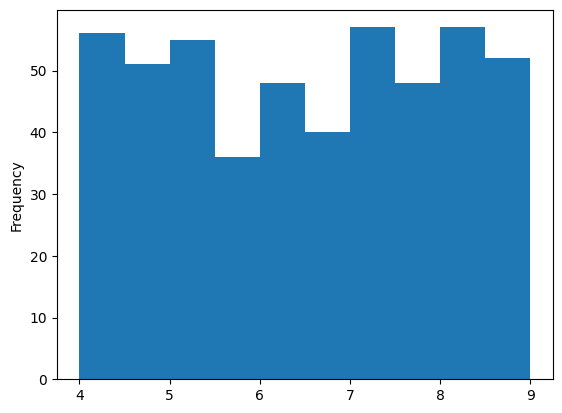

In [16]:
df['Sleep_Duration'].plot(kind='hist')

In [17]:
df['Screen_Time'].value_counts()

,count
Screen_Time,
3.6,22
3.4,21
2.8,21
3.5,21
1.8,20
3.2,20
2.3,19
2.4,19
1.2,19


<Axes: ylabel='Frequency'>

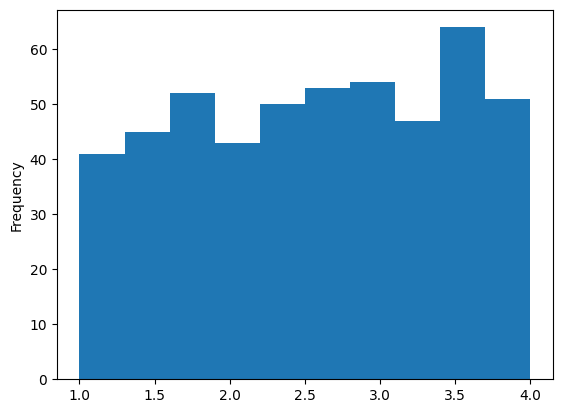

In [18]:
df['Screen_Time'].plot(kind='hist')

In [19]:
df['Caffeine_Intake'].value_counts()

,count
Caffeine_Intake,
2,92
4,88
0,85
3,82
1,79
5,74


<Axes: ylabel='Frequency'>

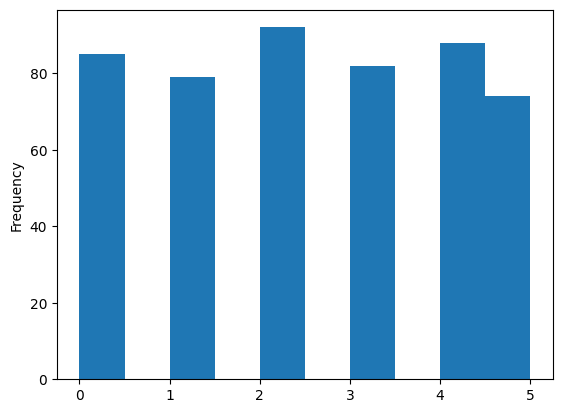

In [20]:
df['Caffeine_Intake'].plot(kind='hist')

In [21]:
df['Physical_Activity'].value_counts()

,count
Physical_Activity,
53,9
27,9
92,8
99,8
108,8
...,...
30,1
82,1
72,1


<Axes: ylabel='Frequency'>

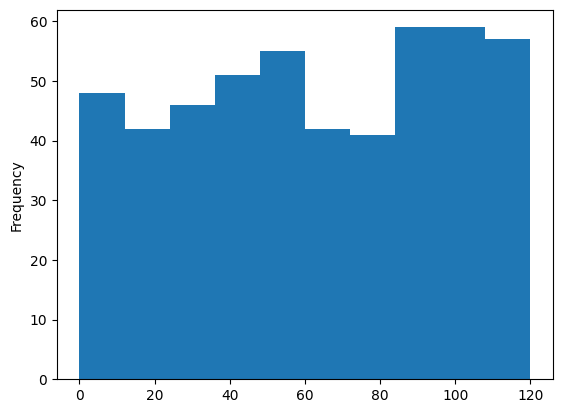

In [22]:
df['Physical_Activity'].plot(kind='hist')

In [23]:
df['Weekday_Sleep_End'].value_counts()

,count
Weekday_Sleep_End,
8.98,5
8.45,5
8.23,4
6.31,4
5.27,4
...,...
6.01,1
6.98,1
6.18,1


<Axes: ylabel='Frequency'>

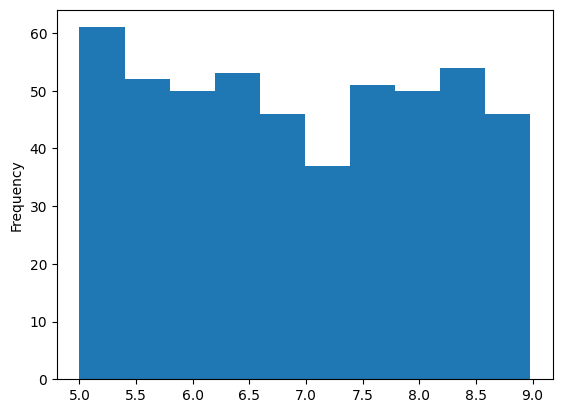

In [24]:
df['Weekday_Sleep_End'].plot(kind='hist')

In [25]:
df['Weekend_Sleep_Start'].value_counts()

,count
Weekend_Sleep_Start,
8.96,3
20.47,3
11.53,3
15.25,3
16.09,2
...,...
13.79,1
20.14,1
18.11,1


<Axes: ylabel='Frequency'>

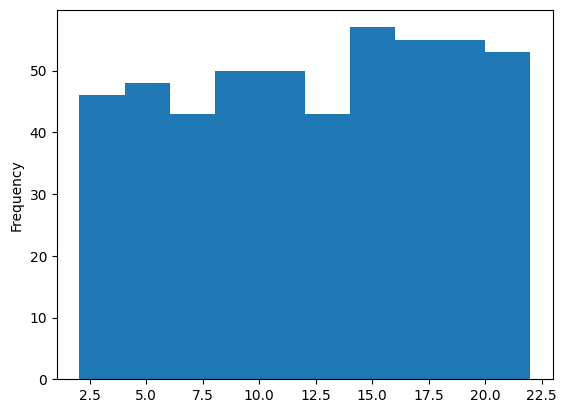

In [26]:
df['Weekend_Sleep_Start'].plot(kind='hist')

Relationship Analysis

In [27]:
correlation = df['Age'].corr(df['Sleep_Duration'])
correlation

-0.016015369056793058

In [28]:
correlation = df['Age'].corr(df['Sleep_Quality'])
correlation

0.01996876110208204

In [29]:
correlation = df['Physical_Activity'].corr(df['Sleep_Quality'])
correlation

-0.013508830985428622

In [30]:
correlation = df['Sleep_Quality'].corr(df['Screen_Time'])
correlation

0.00941062932603345

In [31]:
correlation = df['Screen_Time'].corr(df['Weekend_Sleep_Start'])
correlation

-0.04479158713879349

In [32]:
correlation = df['Physical_Activity'].corr(df['Age'])
correlation

0.016019475502205803

In [33]:
correlation = df['Sleep_Duration'].corr(df['Gender_Numeric'])
correlation

0.058194394955846156

In [34]:
correlation = df['Sleep_Quality'].corr(df['Gender_Numeric'])
correlation

0.07673954585837656

In [35]:
correlation = df['Caffeine_Intake'].corr(df['Gender_Numeric'])
correlation

-0.06752448301042556